In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
import cv2

In [5]:
from glob import glob
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [6]:

train_path = 'kaggle/train'
valid_path = 'kaggle/val'

In [7]:
folders = glob('kaggle/train/*')

In [8]:
folders

['kaggle/train\\1. Enfeksiyonel',
 'kaggle/train\\2. Ekzama',
 'kaggle/train\\3. Pigment',
 'kaggle/train\\4. Benign',
 'kaggle/train\\5. Malign']

In [9]:
len(folders)

5

In [10]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(len(folders), activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [12]:
# Compile the model

# Learning Rate
learning_rate = 0.0001 

# Compile the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Create ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
# Load the dataset using flow_from_directory
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 28761 images belonging to 5 classes.


In [15]:
validation_generator = val_datagen.flow_from_directory(
    valid_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 7203 images belonging to 5 classes.


In [59]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32)

Epoch 1/10
898/898 [==============================] - 1255s 1s/step - loss: 1.1267 - accuracy: 0.5286 - val_loss: 0.9667 - val_accuracy: 0.5929
Epoch 2/10
898/898 [==============================] - 1239s 1s/step - loss: 0.9826 - accuracy: 0.5877 - val_loss: 0.9480 - val_accuracy: 0.6007
Epoch 3/10
898/898 [==============================] - 1259s 1s/step - loss: 0.9007 - accuracy: 0.6288 - val_loss: 0.8401 - val_accuracy: 0.6556
Epoch 4/10
898/898 [==============================] - 1244s 1s/step - loss: 0.8031 - accuracy: 0.6688 - val_loss: 0.7913 - val_accuracy: 0.6839
Epoch 5/10
898/898 [==============================] - 1234s 1s/step - loss: 0.6964 - accuracy: 0.7159 - val_loss: 0.7501 - val_accuracy: 0.7096
Epoch 6/10
898/898 [==============================] - 1241s 1s/step - loss: 0.5936 - accuracy: 0.7621 - val_loss: 0.7437 - val_accuracy: 0.7371
Epoch 7/10
898/898 [==============================] - 1231s 1s/step - loss: 0.4940 - accuracy: 0.8069 - val_loss: 0.6854 - val_accuracy:

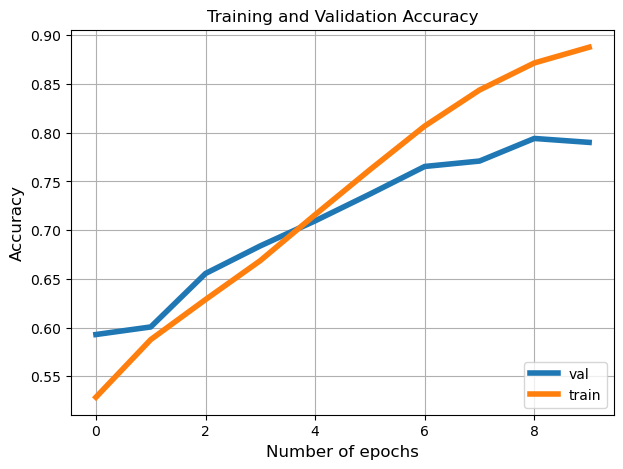

In [60]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

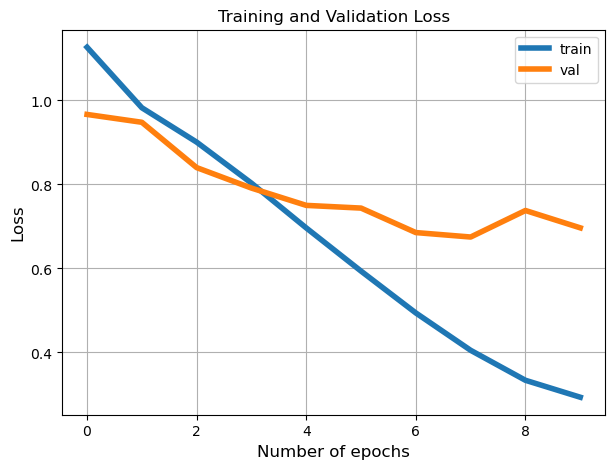

In [61]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [63]:
model.save('skin_disease_identification_new.h5')

In [18]:
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import load_model

# Load the model
model = load_model('skin_disease_identification_new.h5')

# Make predictions on the test set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Assuming you have y_true as the true labels for the validation set
y_true = validation_generator.labels[:len(y_pred_classes)]


target_names = ["Infection", "Ezcema", "Pigment", "Benign", "Menign"]
print(classification_report(y_true, y_pred, target_names=target_names))

226/226 [==============================] - 99s 436ms/step
              precision    recall  f1-score   support

   Infection       0.90      0.88      0.89      1442
      Ezcema       0.90      0.90      0.90      1452
     Pigment       0.89      0.89      0.89      1450
      Benign       0.88      0.90      0.89      1399
      Menign       0.89      0.89      0.89      1460

    accuracy                           0.89      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.89      0.89      0.89      7203



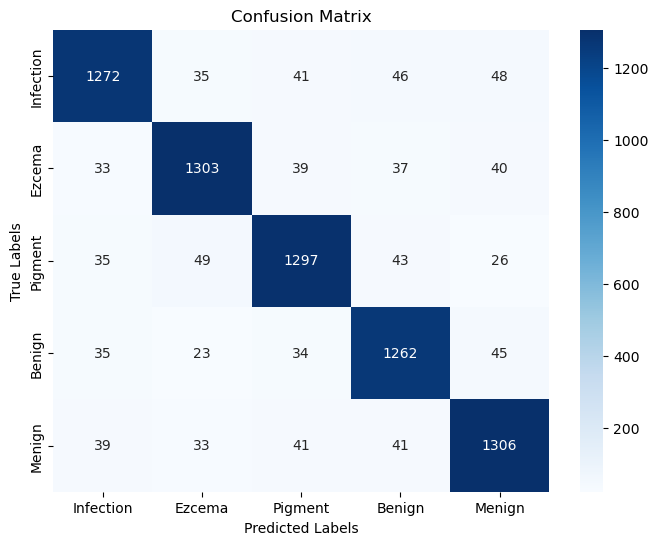

F1 Score: 0.8940729511959968
Mean Absolute Error: 0.21310565042343468


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error
from tensorflow.keras.models import load_model


# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ["Infection", "Ezcema", "Pigment", "Benign", "Menign"]
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print('F1 Score:', f1)
print('Mean Absolute Error:', mae)

1/1 [==============================] - 0s 32ms/step
[[0.33907455 0.08999975 0.04269355 0.39848486 0.1297473 ]]
3
Benign


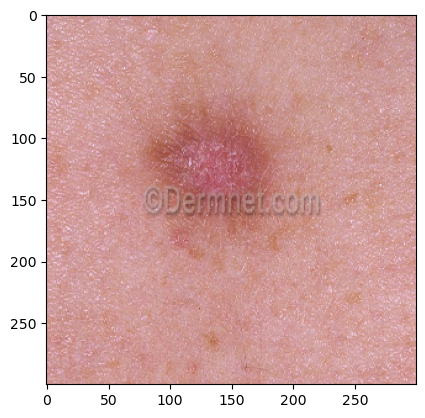

In [24]:
import cv2

img_test = cv2.imread(r'C:\Users\ranaw\Downloads\dermatofibroma-31.jpg')
img_resize = cv2.resize(img_test,(300,300))
img_scaled = img_resize/255

#BGR to RGB
img_rgb = np.flip(img_scaled, axis=-1)

plt.imshow(img_rgb)
img_reshaped = np.reshape(img_rgb,[1,300,300,3])
#img_array = img_to_array(img_rgb) #It is better to use these two lines instead of img_reshaped = np.reshape(img_rgb,[1,256,256,3]). Both give same result but these do not depend on the scenario.
#img_reshaped = img_array.reshape((1,) + img_array.shape)

input_pred = model.predict(img_reshaped)
print(input_pred)
input_label = np.argmax(input_pred)
print(input_label)


if input_label == 0:
    print("Infection")
elif input_label == 1:
    print("Ezcema")
elif input_label == 2:
    print("Pigment")
elif input_label == 3:
    print("Benign")
elif input_label == 3:
    print("Menign")